In [1]:
pwd

'/Users/krupa'

In [2]:
cd /Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject

/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject


In [3]:
pwd

'/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject'

In [4]:
ls

Task2/               json-simple-1.1.jar* src/
bin/                 output/


In [5]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import text
import re
import nltk

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
stop_words = text.ENGLISH_STOP_WORDS

In [7]:
def remove_punctuations(word):
    return re.sub("[^a-zA-Z]", "", word)
print(remove_punctuations("Testing Remove Punctuations"))

TestingRemovePunctuations


In [8]:
def read_data(filePath):
    return pd.read_csv(filePath)

In [9]:
def stop_words_removal(sentance):
    textList = re.split(" |\.",str(sentance))
    return ' '.join([word.lower().strip() for word in textList if remove_punctuations(word.lower()) not in set(stop_words)])

In [10]:
def get_pos_tags(sentance):
    text = nltk.word_tokenize(sentance)
    posList = nltk.pos_tag(text)
    filt = filter(lambda tup:tup[1] in ('JJ','ADV','ADJ'),posList)
    posTags = list(zip(*filt))
    
    if len(posTags) > 0:
        return ' '.join(posTags[0])
    else:
        return sentance

In [11]:
#remove stop words from text
data = read_data("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/review_sub_task2.csv")
print(data.get_value(49, 'text'))

This place has a lot of great things going on. When you enter through the doors you might get a second thought about ordering food from what appears to be a mini mart for noodles and other random trinkets; don't be an idiot! Stay in line and get something ..anything ..it is all good.  I absolutely enjoyed their cheese steak sandwiches. The Italian sodas were always refreshing and they have so many other things.   Take a second to read the owners story it adds to the reason you will like this place.


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
print(data.head(n=10))

              business_ID               review_id  stars  cool  useful  funny  \
0   cHdJXLlKNWixBXpDwEGbA  6BnQwlxRn7ZuWdzninM9sQ    3.0     1       1      7   
1  qx6WhZ42eDKmBchZDax4dQ  Amo5gZBvCuPc_tZNpHwtsA    5.0     0       1      0   
2   5FIOXmUE3qMviX9GafGHQ  SWiEJZUJM6rUDJFwbWB6OA    5.0     0       0      0   
3   yNPh5SO7wr8HPpVCDPbXQ  JYdhCDyR6lYfN2qnSspLlQ    5.0     0       0      0   
4   r5PLDU4mSbde5XekTXSCA  lDJIaF4eYRF4F7g6Zb9euw    4.0     0       2      0   
5   5FIOXmUE3qMviX9GafGHQ  k3Ctxs75Yv3Hzp3pJT2aHw    5.0     0       0      0   
6   fbQaKW0Lte0JQopbnjdKg  XsSvuw965C61RNQtzFmv7w    5.0     0       0      0   
7   cHdJXLlKNWixBXpDwEGbA  ljyWWUY5WHa5iOweyvYsPA    5.0     2       2      2   
8  wUKzaS1MHg94RGM6z8u9mw  -wm-SjWHKYzfWYOxdoIJIQ    4.0     0       1      0   
9   yNPh5SO7wr8HPpVCDPbXQ  OED6UmN9WWtBrGCfpokffg    3.0     6      11      4   

                                                text  
0  I love chinese food and I love mexican food. W... 

In [13]:
data_with_stop_removed = data.copy()


In [15]:
data_with_stop_removed['text'] = data['text'].apply(stop_words_removal)
print(data_with_stop_removed.head(n=2))

              business_ID               review_id  stars  cool  useful  funny  \
0   cHdJXLlKNWixBXpDwEGbA  6BnQwlxRn7ZuWdzninM9sQ    3.0     1       1      7   
1  qx6WhZ42eDKmBchZDax4dQ  Amo5gZBvCuPc_tZNpHwtsA    5.0     0       1      0   

                                                text  
0  love chinese food love mexican food  wrong? co...  
1  family loves food  quick  friendly  delicious ...  


In [16]:
data_with_POS_tags = data.copy()
data_with_POS_tags['text'] = data['text'].apply(get_pos_tags)
#print(data_with_POS_tags.head(n=5))

In [17]:
#Drop columns not required
data_with_stop_removed.drop(['cool','useful','funny','review_id'],axis = 1, inplace = True, errors = 'ignore')

In [18]:
#Save sorted data to CSV
data.to_json("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/dataSorted.json")

In [19]:
#Save data for further processing
data_with_stop_removed.to_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/dataStopWordRemoved.csv",sep=",")

In [20]:
#Save data for further processing
data_with_POS_tags.to_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/dataPOStags.csv", sep=",")

Task 2

In [21]:
import json
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVR
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import sent_tokenize, word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cross_validation import train_test_split


In [22]:
#Calculate SVM

In [23]:
def read_json():
    """
    The function is used to read the content in the JSON file and then add each line to a list
    :return: list of JSON strings
    """
    with open("/Volumes/Krupa/MISStudy/Spring\ 2019/Search/Final\ Project/output/task2/CalculatedRatings_100.csv") as json_data:
        json_list = []
        for line in json_data:
            json_dict = json.loads(line)
            json_list.append(json_dict)
    return json_list

In [24]:
def CalculateSVM(data):
    """
    Function is used to classify review text based on Support Vector Machine Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    print("SVM")
    vectorizer = TfidfVectorizer()
    classifier = LinearSVC()
    train, test = train_test_split([(i['text'], i['stars']) for i in data],
                                   test_size=0.20,
                                   random_state=10)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    print(score)

In [25]:
def CalculateMNB(data):
    """
    Function is used to classify review text based on Multinomial Bayes Classifier
    :param data: Review text with the rating from the data set
    :return: print the accuracy Score
    """
    
    print("Calculating MNB")
    vectorizer = TfidfVectorizer()
    classifier = MultinomialNB()
    train, test = train_test_split([(i['text'], i['stars']) for i in data],
                                   test_size=0.20,
                                   random_state=0)
    x_train = vectorizer.fit_transform(i[0] for i in train)
    x_test = vectorizer.transform(i[0] for i in test)
    classifier.fit(x_train, [i[1] for i in train])
    score = classifier.score(x_test, [i[1] for i in test])
    print(score)


In [27]:
data = read_json()

In [28]:
data

[{'date': '2015-04-01 16:30:00',
  'review_id': '6BnQwlxRn7ZuWdzninM9sQ',
  'user_id': 'JSrP-dUmLlwZiI7Dp3PQ2A',
  'cool': 1,
  'stars': 3.0,
  'text': 'I love chinese food and I love mexican food. What can go wrong? A couple of things. First things first, this place is more of a "rice bowl" kind of place. I thought it was going to be more diverse as far as the menu goes, but its mainly rice bowls you get with different kinds of meats. The ordering was a little confusing at first, but one of the employees helped us out and I got the 2-item bowl and got the jade chicken and hengrenade chicken with all rice(jerk). I also ordered a jade chicken quesadilla on the side.\n\nI\'m gonna admit, this place looks kinda dirty. I don\'t think Arizona uses those health department letter grade system like California does, but if I were to just judge by how it looked inside, i\'d give it a "C" grade lol. We waited for about 15 minutes or so and finally got our food. We took it to go and ate at our hot

In [29]:
if data:
    CalculateSVM(data)

SVM
0.6500127825864651


In [30]:
if data:
    CalculateMNB(data)

Calculating MNB
0.5195208356159381


In [25]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

CSVFILE = '/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/output/task2/CalculatedRatings_1000.csv'
test_df = pd.read_csv(CSVFILE)

In [29]:
test_df.columns = ["business_ID", "stars", "rating","pos_sentiment", "neg_sentiment","average", "match"]
test_df

,business_ID,stars,rating,pos_sentiment,neg_sentiment,average,match
0,oxwGyA17NL6c5t1Etg5WgQ,3.0,1,0.551339,0.448661,0.102677,UNMATCH
1,8mIrXLrOnAqWsB5JrOojQ,4.0,5,0.996260,0.003740,0.992521,MATCH
2,LUN6swQYa4xJKaMUEUOEw,4.0,5,0.999264,0.000736,0.998529,MATCH
3,NyLYY8q1H3hfsTwuwLPCg,4.0,5,0.998800,0.001200,0.997600,MATCH
4,cHdJXLlKNWixBXpDwEGbA,3.0,1,0.018653,0.981347,-0.962694,UNMATCH
5,6lj2BJ4tJeu7db5asGHQ4w,5.0,5,0.972081,0.027919,0.944162,MATCH
6,yIw6dZflNix4BdwIyTNGA,3.0,4,0.882347,0.117653,0.764695,MATCH
7,qx6WhZ42eDKmBchZDax4dQ,5.0,5,0.925532,0.074468,0.851065,MATCH
8,I4NrMVc26qWr08S3Q1ow,4.0,1,0.035699,0.964301,-0.928602,UNMATCH
9,dLrfS1vT3JMzgCUGtiow,5.0,1,0.063415,0.936585,-0.873171,UNMATCH


In [31]:
test_df.dtypes

business_ID       object
stars            float64
rating             int64
pos_sentiment    float64
neg_sentiment    float64
average          float64
match             object
dtype: object

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

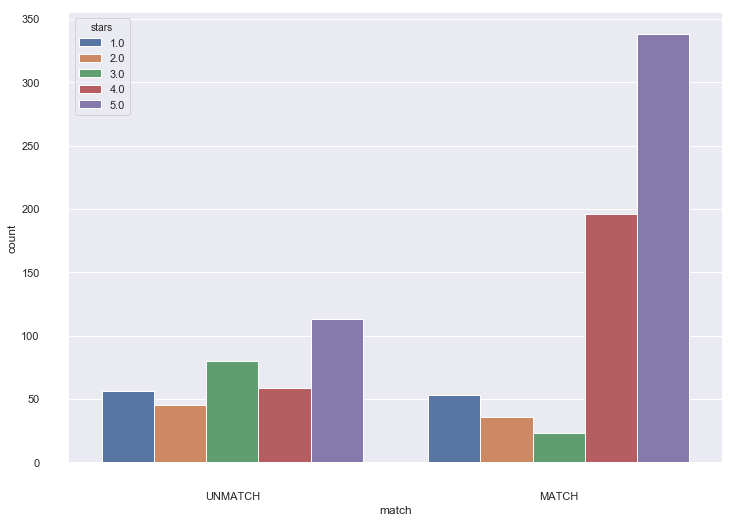

In [40]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('match',data=test_df,hue = 'stars')
sns.despine(offset=20, trim=True)